In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [115]:
data = pd.read_csv('03_Владивосток.csv')

In [116]:
data

,Год,янв,фев,мар,апр,май,июн,июл,авг,сен,окт,ноя,дек,средняя
0,1872,-18.0,-11.6,-2.6,3.6,8.8,13.8,18.1,18.5,15.4,9.6,-0.1,-10.4,3.8
1,1873,-17.4,-12.7,-5.7,2.2,7.9,12.6,18.0,19.9,14.0,7.6,-2.1,-11.2,2.8
2,1874,-12.6,-8.8,-3.1,4.8,8.8,14.4,20.1,21.0,15.9,8.2,-2.2,-9.8,4.7
3,1875,-13.0,-10.3,-0.5,3.0,9.2,14.6,20.0,19.6,17.0,9.1,-1.8,-10.3,4.7
4,1876,-14.6,-8.7,-2.1,5.3,10.7,12.8,21.0,21.8,15.0,10.8,-2.9,-13.0,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2015,-10.5,-7.1,0.1,5.1,10.7,13.9,18.6,20.2,17.0,8.9,-2.6,-6.1,5.7
144,2016,-12.4,-8.3,0.3,5.2,11.0,12.7,18.1,21.4,16.5,7.7,-4.5,-7.7,5.0
145,2017,-9.8,-6.6,0.4,6.8,11.1,13.7,20.3,19.6,16.9,8.5,-1.5,-11.1,5.7
146,2018,-12.7,-10.6,-2.2,5.6,10.2,13.5,18.5,19.9,16.4,10.4,1.0,-7.7,5.2


In [101]:
#data.replace(999.9, np.NaN, inplace=True)

In [10]:
date_first, date_last = data['Год'].min(), data['Год'].max()

In [4]:
columns = data.columns[1:]

## Интерполяционный многочлен Лагранжа


$$
f(x) = \sum_{i=1}^{n}\frac{\prod_{j\neq i}(x - x_j)}{\prod_{j\neq i}(x_i - x_j)}y_i
$$

In [107]:
def make_lagrange_polynom(x, y, p):
    res = 0
    for i in range(len(x)):
        frac = 1
        for j in range(len(x)):
            if j != i and y[j] != 999.9:
                frac *= (p - x[j])/(x[i] - x[j])
        res += frac*y[i]
    return res

In [117]:
def interpolate_weather(data, year, month):
    date_first, date_last = data['Год'].min(), data['Год'].max()
    start = year - date_first
    end = start + 12
    grid = np.arange(year, year+12.1, 0.1)
    x, y = data['Год'][start:end+1].values, data[month][start:end+1].values
    print(x, y)
    vals = list(map(lambda p: make_lagrange_polynom(x, y, p), grid))
    
    plt.figure(figsize=(10, 7))
    plt.plot(grid, vals, label=month)
    plt.plot(x, y, marker='o', linestyle='dashed')
    plt.legend()

[2017 2018 2019] [-11.1  -7.7 999.9]


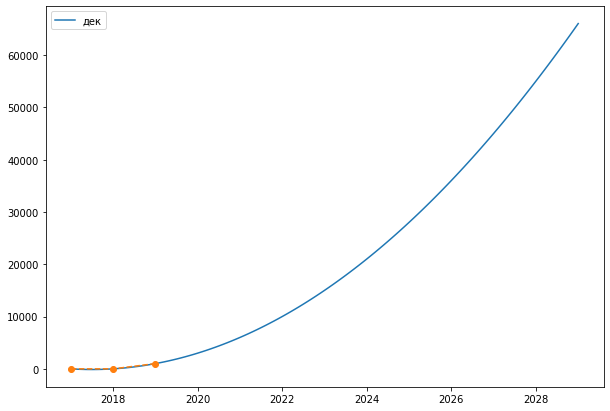

In [118]:
interpolate_weather(data, 2017, 'дек')